In [24]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

df = pd.read_csv('data/train-data.csv')
X = df['title'].str.lower()
y = df['label']

def preprocess_text(txt):
    txt = " ".join([snowball_stemmer.stem(wordnet_lemmatizer.lemmatize(t)) for t in txt.split(" ")])
    return txt
    
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w\w\w+',
    stop_words='english',
    ngram_range=(1, 1),
    min_df=2,
    max_features=1000,
    preprocessor=preprocess_text)
word_vectorizer.fit(X)

X_train_dtm = word_vectorizer.transform(X)

# clf_lr = LogisticRegression(solver='liblinear')
clf_lr = svm.SVC(kernel='linear')

clf_lr.fit(X_train_dtm, y)

def precision_class_2(estimator, X, y):
    y_pred = estimator.predict(X)
    return precision_score(y, y_pred, labels=[1])

cv_score = np.mean(cross_val_score(clf_lr, X_train_dtm, y, cv=5, scoring='roc_auc'))

print('CV score is {}'.format(cv_score))

y_pred = clf_lr.predict(X_train_dtm)

precision, recall, thresholds = precision_recall_curve(y, y_pred)

average_precision = average_precision_score(y, y_pred)

print('Average precision is {}'.format(average_precision))

precision, recall, thresholds = precision_recall_curve(y, y_pred)

print(classification_report(y, y_pred))


CV score is 0.6938888888888888
Average precision is 0.8235294117647058
             precision    recall  f1-score   support

          0       0.91      1.00      0.95        48
          1       1.00      0.75      0.86        20

avg / total       0.93      0.93      0.92        68



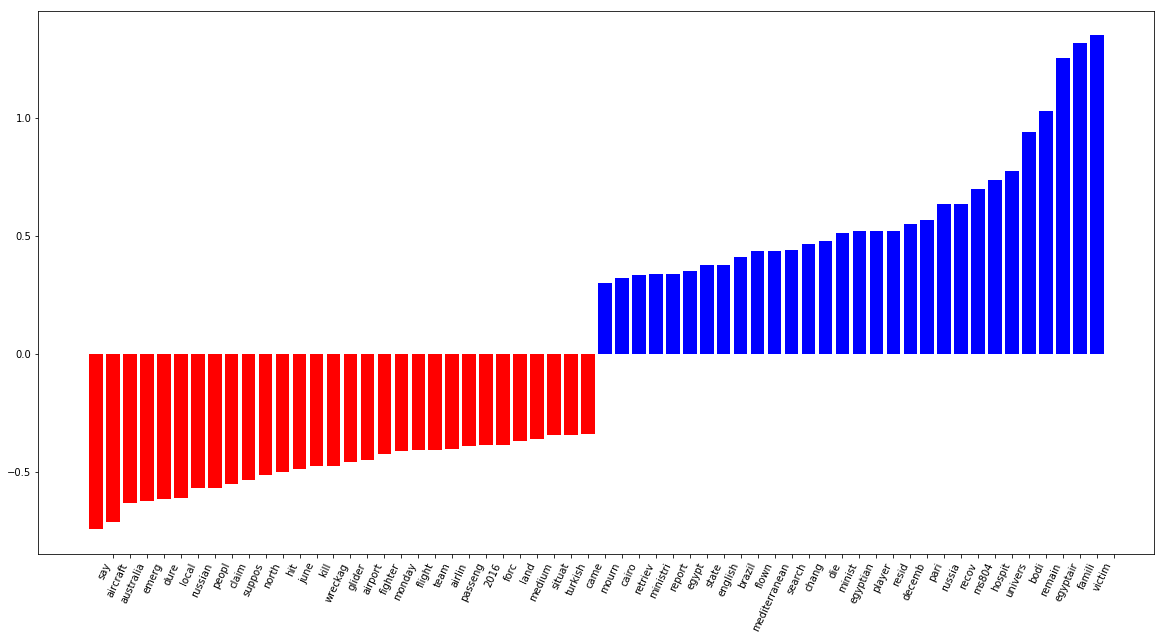

In [15]:

plot_coefficients(clf_lr, word_vectorizer.get_feature_names(), top_features=30)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = np.ravel(classifier.coef_.todense())
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(20, 10))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=65, ha='right')
    plt.show()
    

Text(0.5,1,'2-class Precision-Recall curve: AP=0.98')

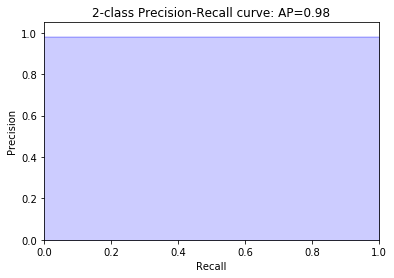

In [296]:
import matplotlib.pyplot as plt
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))